# data cleaning

### load dataset

In [2]:
import pandas as pd
import missingno as msno

cars = pd.read_csv('cars.csv', low_memory=False)

In [3]:
# for each row check if 'land rover' is in the title and if so set the manufacturer to 'land rover'
for index, row in cars.iterrows():
    if 'land rover' in row['title'].lower():
        cars.loc[index, 'manufacturer'] = 'land rover'

### drop unnecessary columns and show matrix

<AxesSubplot:>

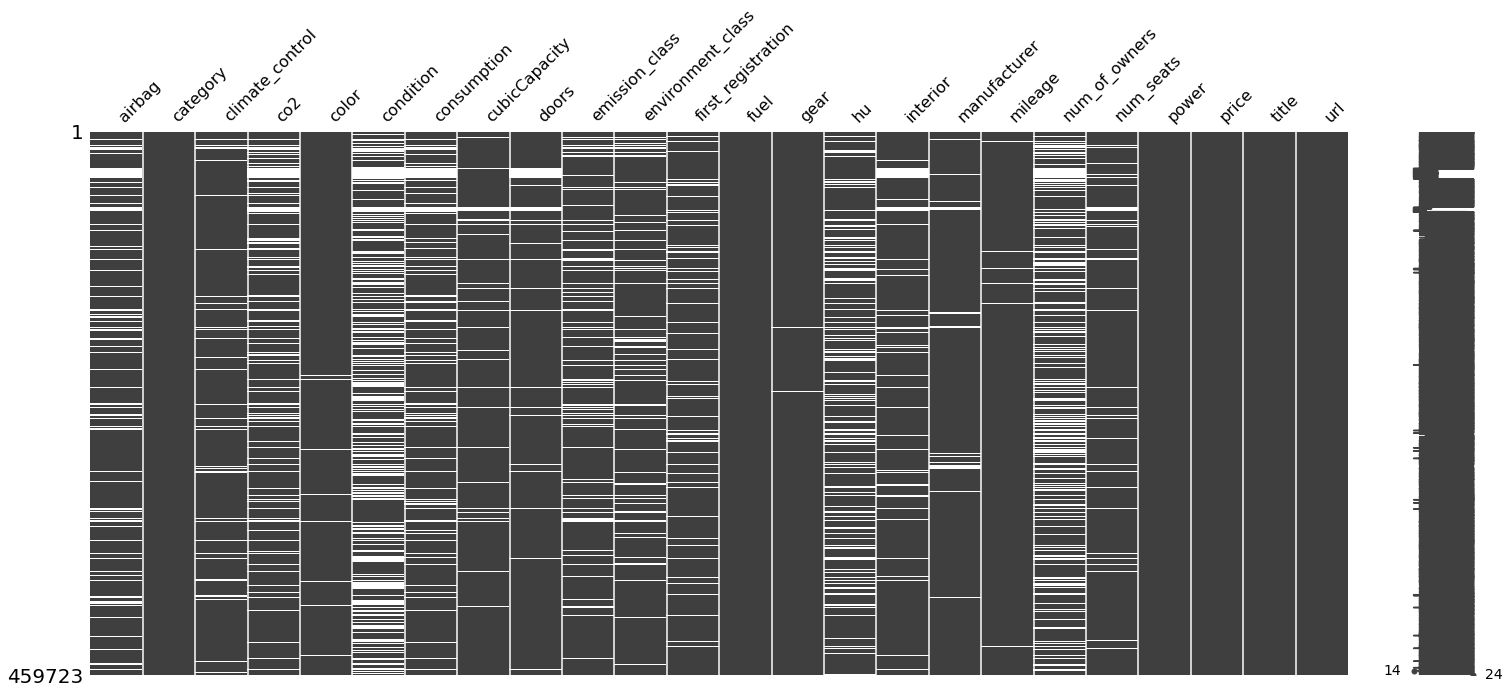

In [4]:
cars.drop(['features', 'scraped_on', 'parking_assistant', 'origin'], axis=1, inplace=True)
msno.matrix(cars)

### drop unrealistic values (wrong inputs etc.)
##### num_of_owners

In [5]:
# drop all rows where num_of_owners is more than 20
cars = cars[cars['num_of_owners'] <= 20]

### sum up corresponding values

#### airbag

<AxesSubplot:>

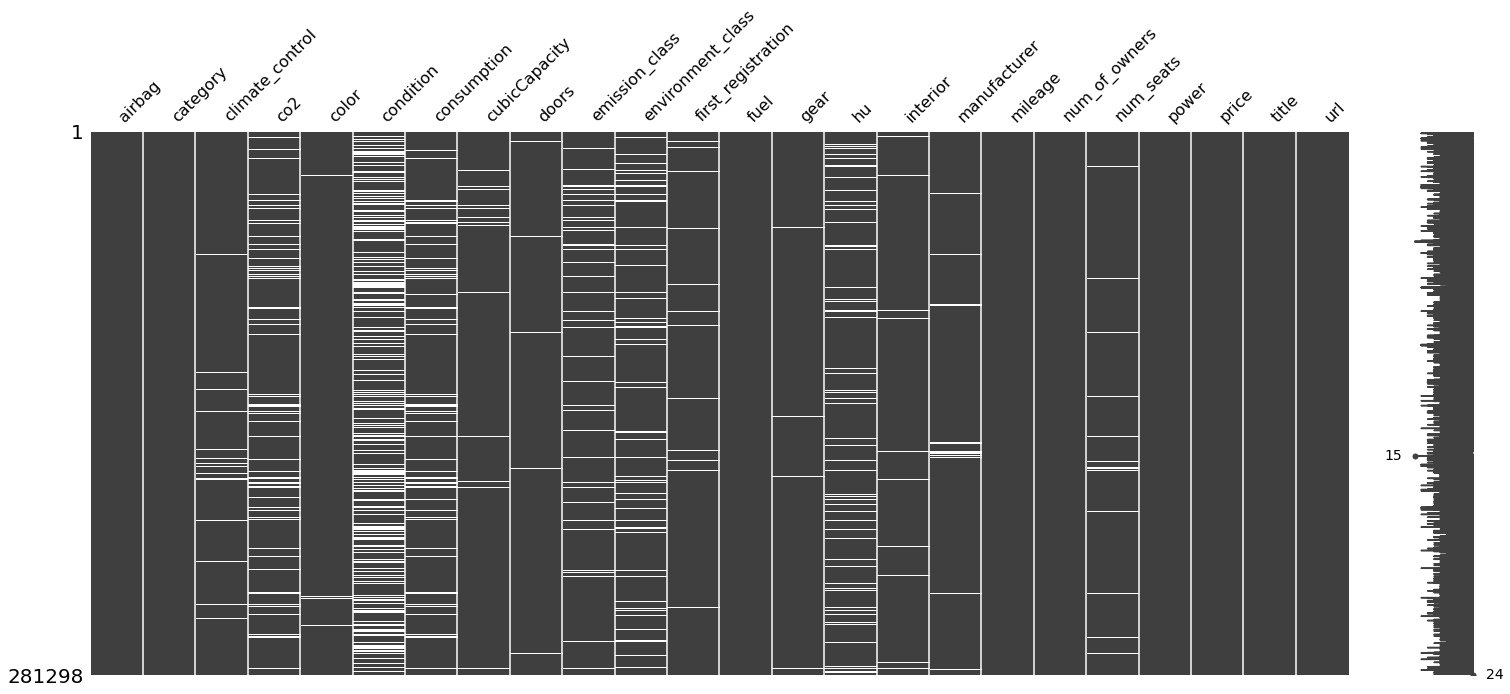

In [6]:
cars = cars[cars['airbag'].notnull()]

# set all airbag values to 'front-airbags' where the value is 'front airbags'
cars['airbag'] = cars['airbag'].replace('front airbags', 'front-airbags')
cars['airbag'] = cars['airbag'].replace('driver airbag', 'fahrer-airbag')
cars['airbag'] = cars['airbag'].replace('front and side airbags', 'front- und seiten-airbags')
cars['airbag'] = cars['airbag'].replace('front and side and more airbags', 'front-, seiten- und weitere airbags')

msno.matrix(cars)

#### climate_control

<AxesSubplot:>

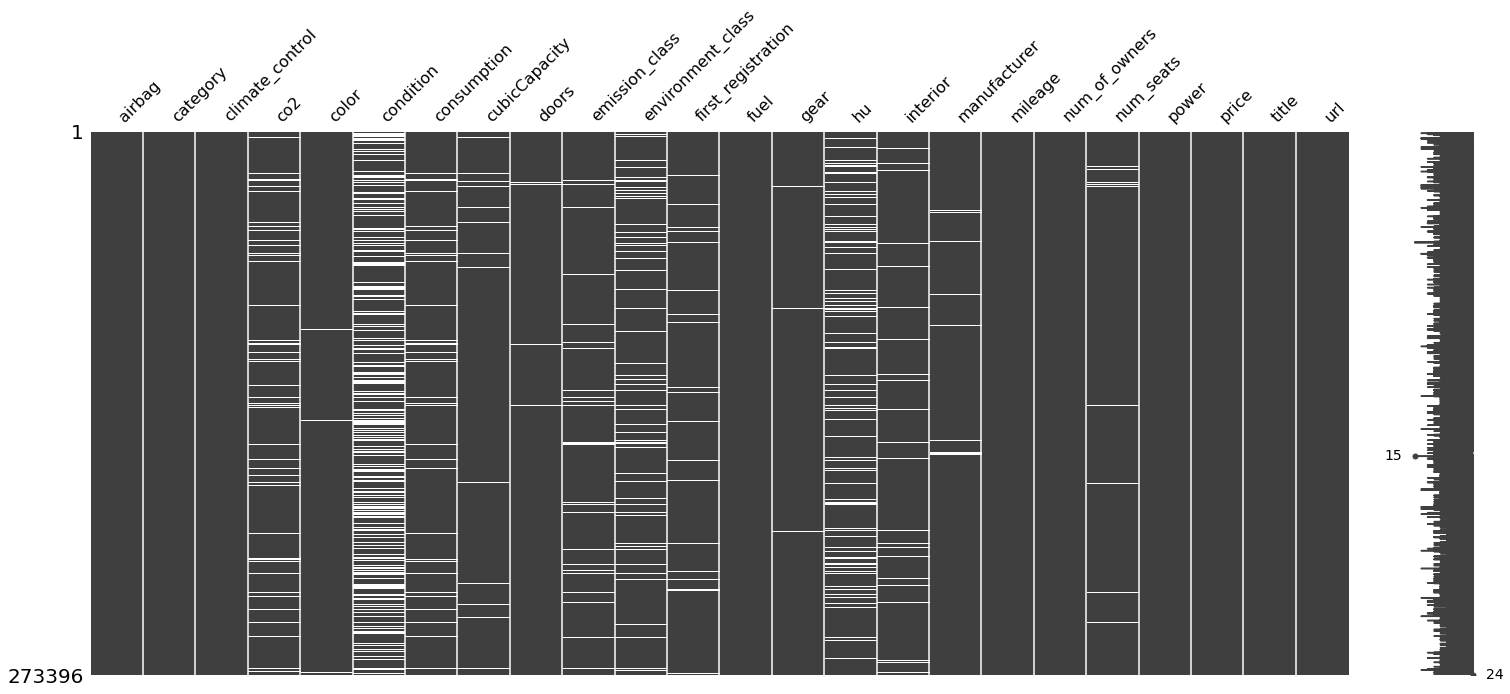

In [7]:
cars = cars[cars['climate_control'].notnull()]

cars['climate_control'] = cars['climate_control'].replace('a/c (man.)', 'klimaanlage')
cars['climate_control'] = cars['climate_control'].replace('no climatisation', 'keine klimaanlage oder -automatik')
cars['climate_control'] = cars['climate_control'].replace('automatic air conditioning', 'klimaautomatik')
cars['climate_control'] = cars['climate_control'].replace('automatic climatisation, 2 zones', '2-zonen-klimaautomatik')
cars['climate_control'] = cars['climate_control'].replace('automatic climatisation, 3 zones', '3-zonen-klimaautomatik')

msno.matrix(cars)

#### color

<AxesSubplot:>

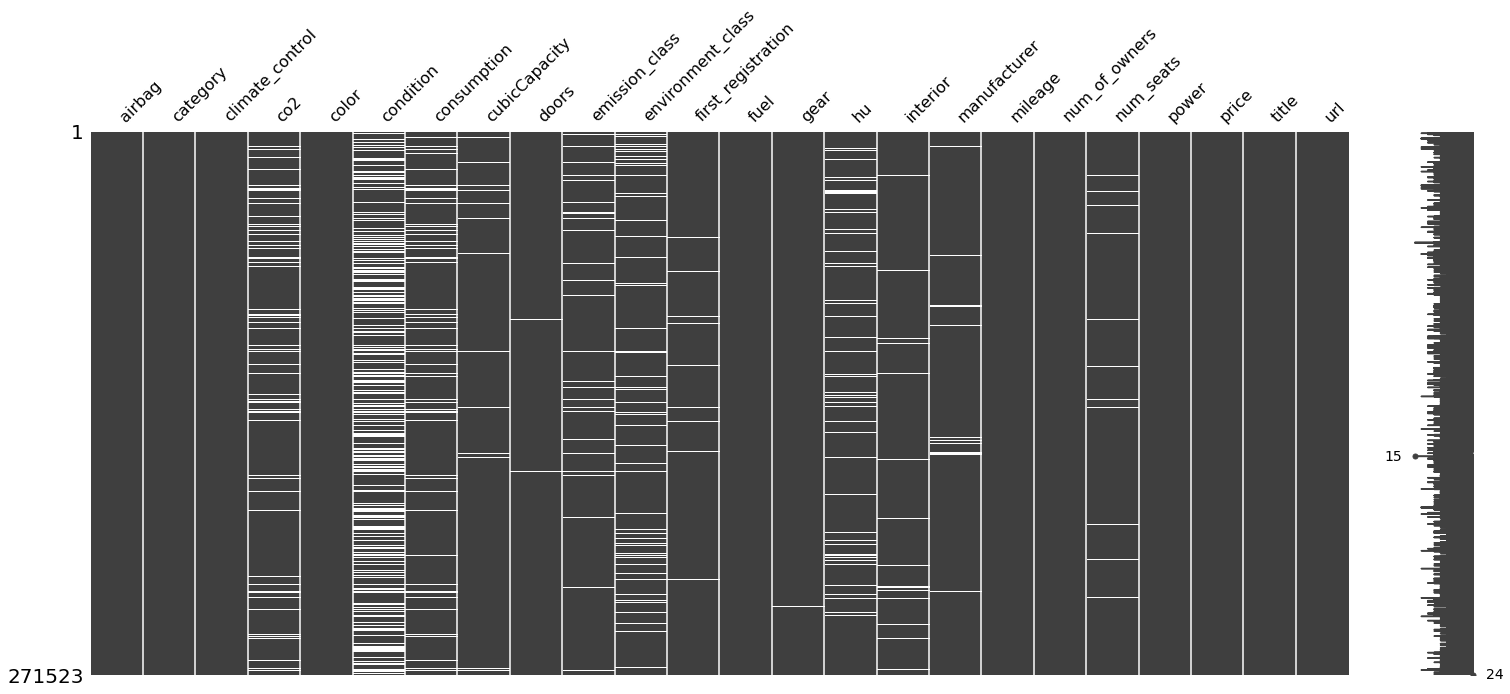

In [8]:
cars = cars[cars['color'].notnull()]

for color in ["rot", "gelb", "blau", "schwarz", "weiß", "grau", "braun", "orange", "pink", "violett", "lila", "grau", "pink", "violett", "silber", "gold", "beige", "grün"]:
    cars['color'] = cars['color'].apply(lambda x: color if color in x.lower() else x)

color_dict = {"red": "rot", "blue": "blau", "black": "schwarz", "white": "weiß", "grey": "grau", "brown": "braun",
              "orange": "orange", "pink": "pink", "violet": "violett", "lila": "lila", "silver": "silber", "gold": "gold",
              "beige": "beige", "green": "grün", "weiss": "weiß", "grün": "grün"}

for key in color_dict:
    cars['color'] = cars['color'].apply(lambda x: color_dict[key] if key in x.lower() else x)

# create a dictionary with the key being each unique color and the value being the toal number of cars with that color
color_amt_dict = cars['color'].value_counts().to_dict()
cars['color'] = cars['color'].apply(lambda x: 'andere' if color_amt_dict[x] < 50 else x)

msno.matrix(cars)

#### condition

<AxesSubplot:>

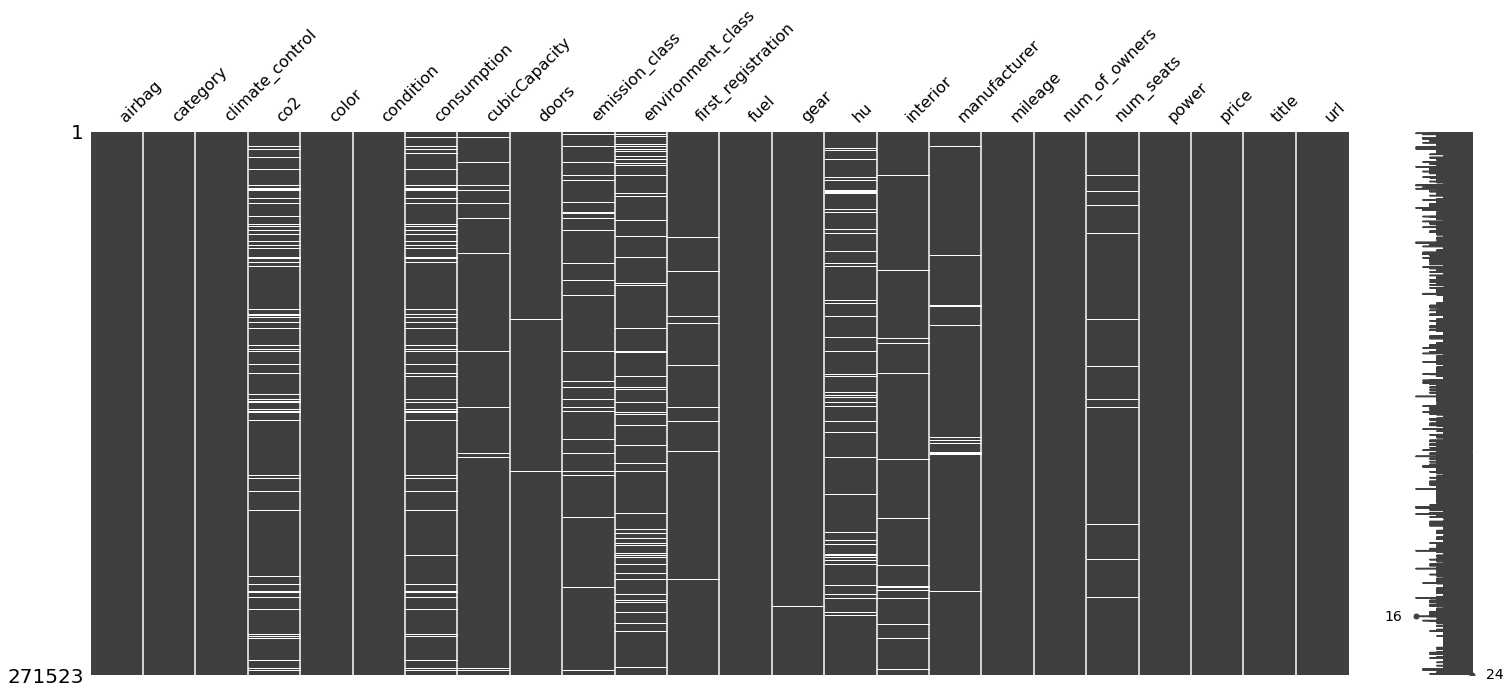

In [9]:
cars['condition'] = cars['condition'].replace('damaged, accident-damaged vehicle, not roadworthy', 'beschädigt, unfallfahrzeug, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('damaged', 'beschädigt')
cars['condition'] = cars['condition'].replace('damaged, accident-damaged vehicle', 'beschädigt, unfallfahrzeug')
cars['condition'] = cars['condition'].replace('accident-free, not roadworthy', 'unfallfrei, nicht fahrtauglich')
cars['condition'] = cars['condition'].replace('repaired accident damage', 'reparierter unfallschaden')
cars['condition'] = cars['condition'].replace('damaged, accident-free', 'beschädigt, unfallfrei')
cars['condition'] = cars['condition'].replace('accident-free', 'unfallfrei')

# set the condition to 'unfallfrei' if the condition is NaN
cars['condition'] = cars['condition'].fillna('unfallfrei')

msno.matrix(cars)

#### fuel

<AxesSubplot:>

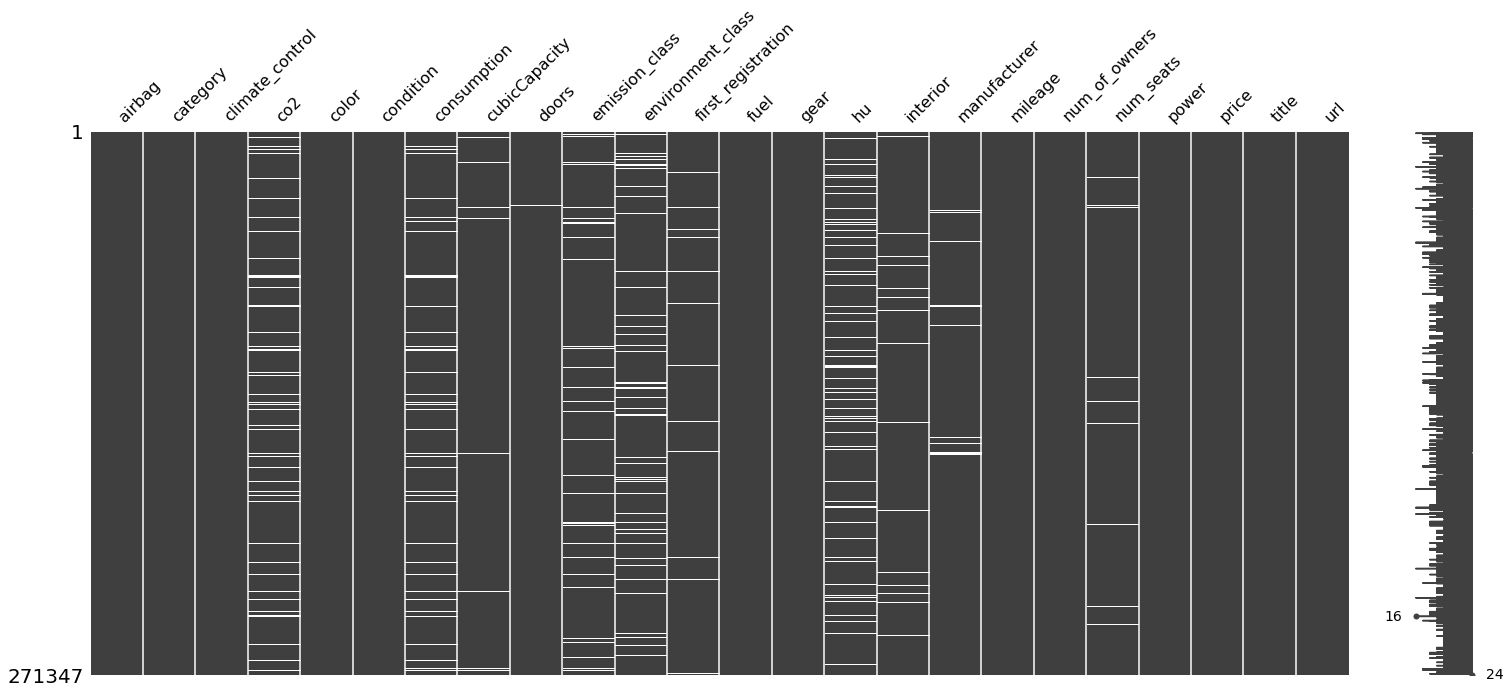

In [10]:
fuels = ["hybrid", "benzin", "diesel", "elektro", "erdgas", "autogas", "wasserstoff", "ethanol", "andere"]
cars = cars[cars['fuel'].notnull()]

# for each row, check if one of the fuels is contained in the fuel value and replace it with the corresponding fuel. Else keep the value as is
for fuel in fuels:
    cars['fuel'] = cars['fuel'].apply(lambda x: fuel if fuel in str(x).lower() else x)

fuel_dict = {"petrol": "benzin"}
for key in fuel_dict:
    cars['fuel'] = cars['fuel'].apply(lambda x: fuel_dict[key] if key in str(x).lower() else x)

# show all unique values of fuel
cars['fuel'].unique()

msno.matrix(cars)

In [11]:
# loop through all cars where fuel is 'elektro' in a for loop
for index, row in cars.iterrows():
    if row['fuel'] == 'elektro':
        # check if co2 is NaN and if so set it to 0
        if pd.isna(row['co2']):
            cars.at[index, 'co2'] = 0
        if pd.isna(row['cubicCapacity']):
            cars.at[index, 'cubicCapacity'] = 0

#### gear

In [12]:
gear_dict = {"manual gearbox": "schaltgetriebe", "automatic transmission":"automatik"}
for key in gear_dict:
    cars['gear'] = cars['gear'].apply(lambda x: gear_dict[key] if key in str(x).lower() else x)

#### interior

In [13]:
interior_list = ["vollleder", "teilleder", "stoff",
                 "andere", "alcantara", "velours",
                 "cloth"]

interior_dict = {"full leather": "vollleder", "part leather": "teilleder",
                 "other": "andere", "velours": "velours", "velour": "velours",
                 "cloth": "stoff"}

for key in interior_dict:
    cars['interior'] = cars['interior'].apply(lambda x: interior_dict[key] if key in str(x).lower() else x)

for interior in interior_list:
    cars['interior'] = cars['interior'].apply(lambda x: interior if interior in str(x).lower() else x)
# ist die loop das problem? ja

for index, row in cars.iterrows():
    if row['interior'] not in interior_list:
        cars.at[index, 'interior'] = 'andere'

In [14]:
# print all unique values of category
cars['category'].unique()

array(['kleinwagen', 'limousine, tageszulassung',
       'suv / geländewagen / pickup', 'limousine', 'kombi',
       'sportwagen / coupé', 'van / minibus', 'cabrio / roadster',
       'van / minibus, jahreswagen',
       'sportwagen / coupé, vorführfahrzeug',
       'kleinwagen, vorführfahrzeug', 'limousine, vorführfahrzeug',
       'van / minibus, vorführfahrzeug', 'kleinwagen, tageszulassung',
       'limousine, neufahrzeug',
       'suv / geländewagen / pickup, vorführfahrzeug',
       'suv / geländewagen / pickup, tageszulassung',
       'suv / geländewagen / pickup, neufahrzeug',
       'kleinwagen, neufahrzeug', 'andere', 'kombi, vorführfahrzeug',
       'kombi, jahreswagen', 'kombi, neufahrzeug',
       'kombi, tageszulassung',
       'suv / geländewagen / pickup, jahreswagen',
       'sportwagen / coupé, neufahrzeug',
       'cabrio / roadster, vorführfahrzeug',
       'cabrio / roadster, neufahrzeug', 'limousine, jahreswagen',
       'sportwagen / coupé, tagesz

##### category (this sucks)

In [15]:
# print unique values of category and the amount of cars with that category order by amount
cars['category'].value_counts().sort_values(ascending=False)

# loop through cars in a for loop
for index, row in cars.iterrows():
    category = str(row['category']).lower()
    cars.at[index, 'cabrio'] = 1 if 'cabrio' in category \
                                    or "roadster" in category \
                                      or "cabriolet" in category else 0
    cars.at[index, 'kleinwagen'] = 1 if 'kleinwagen' in category \
                                        or "small car" in category else 0
    cars.at[index, 'kombi'] = 1 if 'kombi' in category \
                                    or "estate car" in category else 0
    cars.at[index, 'limousine'] = 1 if 'limousine' in category \
                                       or "saloon" in category else 0
    cars.at[index, 'sportwagen'] = 1 if 'sportwagen' in category \
                                        or "coupé" in category\
                                          or "sports car" in category else 0
    cars.at[index, 'geländewagen'] = 1 if 'geländewagen' in category \
                                          or "pickup" in category \
                                            or "suv" in category\
                                              or "off-road" in category else 0
    cars.at[index, 'van'] = 1 if 'van' in category \
                                 or "minibus" in category else 0

cars = cars.drop(columns=['category'])

<AxesSubplot:>

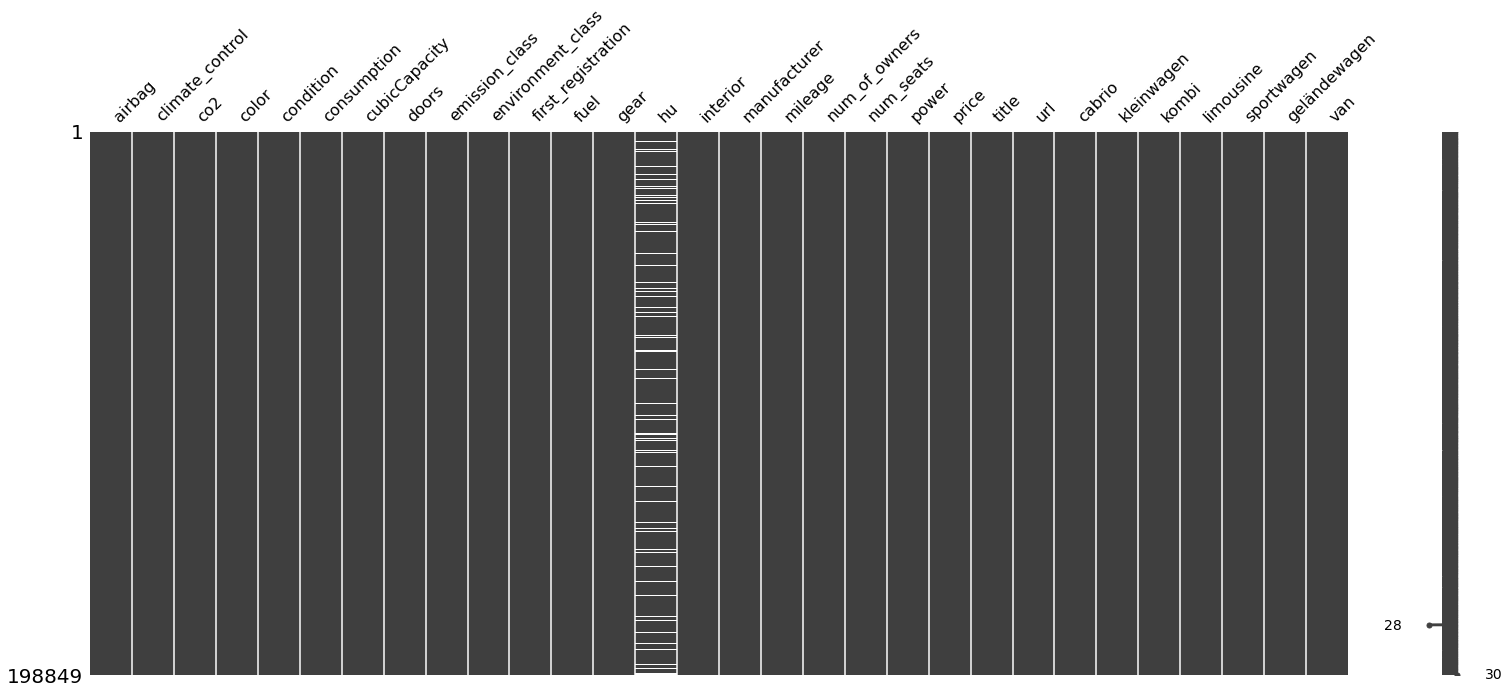

In [16]:
cars = cars[cars['co2'].notnull()]
cars = cars[cars['consumption'].notnull()]
cars = cars[cars['cubicCapacity'].notnull()]
cars = cars[cars['doors'].notnull()]
cars = cars[cars['emission_class'].notnull()]
cars = cars[cars['environment_class'].notnull()]
cars = cars[cars['first_registration'].notnull()]
cars = cars[cars['gear'].notnull()]
cars = cars[cars['manufacturer'].notnull()]
cars = cars[cars['num_seats'].notnull()]
msno.matrix(cars)

In [17]:
# TODO convert number of doors to class -> no 2.5 doors, no 3.5 doors, etc.

In [18]:
# convert the hu column to datetime format then create buckets for each year
cars['first_registration'] = pd.to_datetime(cars['first_registration'])
cars['first_registration'] = cars['first_registration'].dt.year

cars['hu'] = pd.to_datetime(cars['hu'])
cars['hu'] = cars['hu'].dt.year

# fill hu value with 'unknown' where it is NaN
cars['hu'] = cars['hu'].fillna('unknown')

<AxesSubplot:>

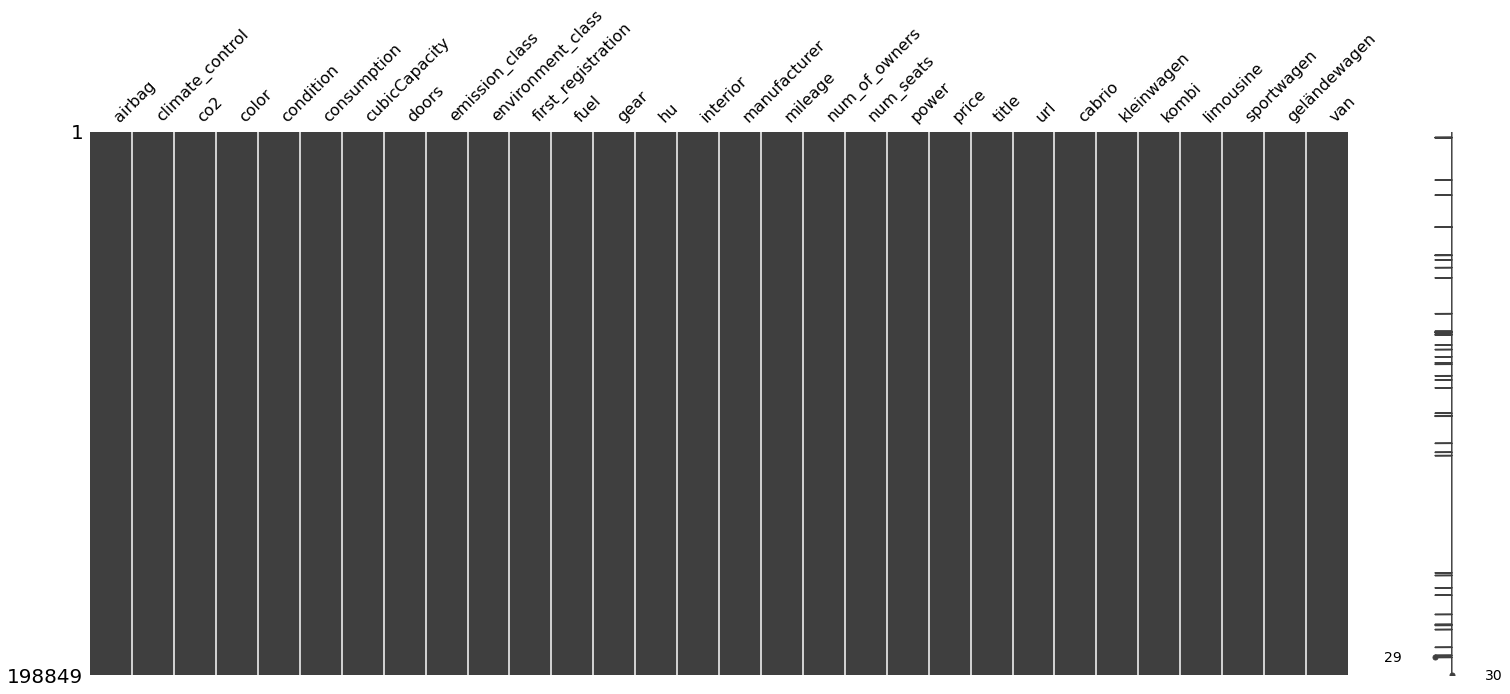

In [19]:
msno.matrix(cars)

<AxesSubplot:>

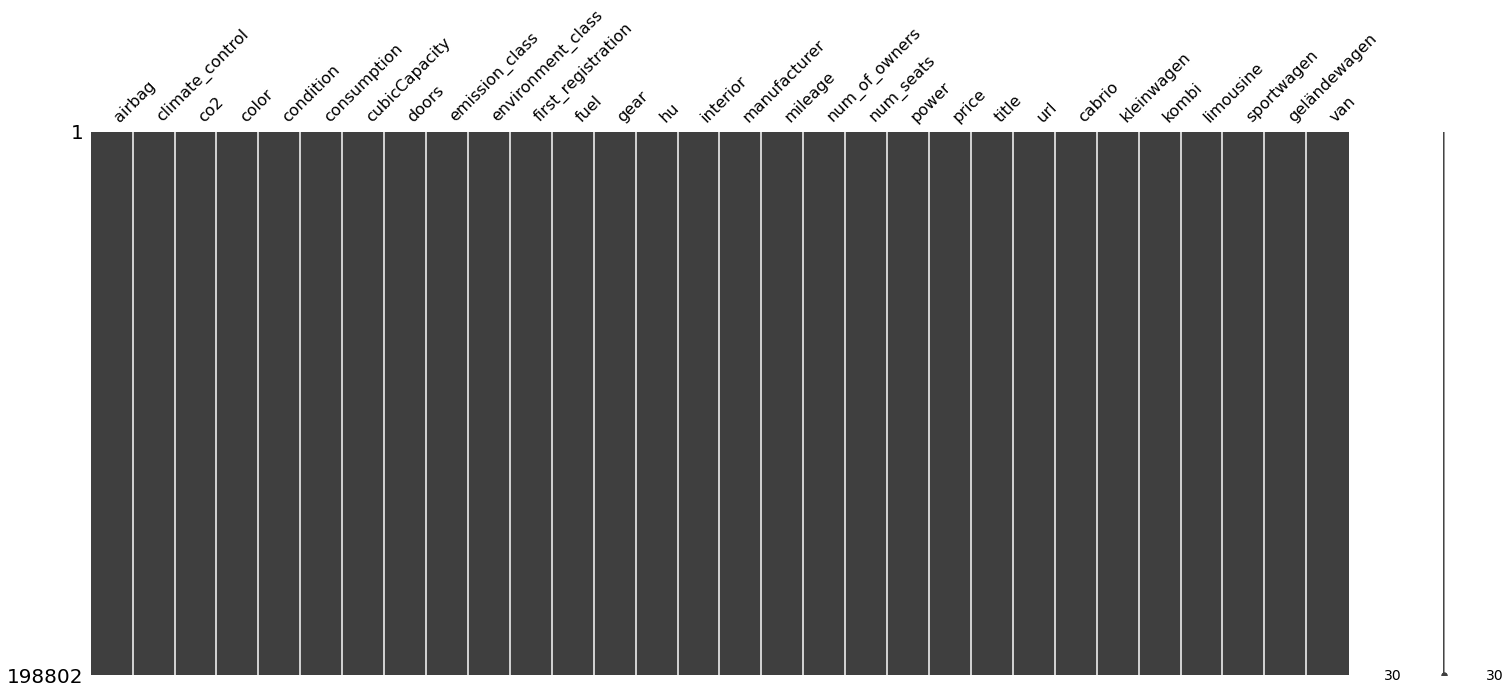

In [20]:
# delete all rows where at least one col is NaN!
cars = cars.dropna()
msno.matrix(cars)

In [21]:
# for each column, print the amount of values possible
for col in cars.columns:
    print(col, len(cars[col].unique()))

airbag 4
climate_control 6
co2 429
color 14
condition 11
consumption 999
cubicCapacity 570
doors 3
emission_class 6
environment_class 4
first_registration 34
fuel 9
gear 3
hu 28
interior 6
manufacturer 57
mileage 38690
num_of_owners 11
num_seats 13
power 419
price 12900
title 89650
url 198802
cabrio 2
kleinwagen 2
kombi 2
limousine 2
sportwagen 2
geländewagen 2
van 2


In [22]:
# delete all rows where the price is over 1M
cars = cars[cars['price'] < 1000000]

In [23]:
cars.rename({"geländewagen": "gelaendewagen"}, axis=1, inplace=True)

In [24]:
# save the dataset as a csv file
cars.to_csv('cars_clean.csv', index=False)
